In [1]:
#Kutuphanler
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Gelen sinyallerin grafiklerini ciziyor
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1
            
#Özellikleri cikarilan sinyallerin grafiklerini ciziyor
def plot_feature(feature, text):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle(text, size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(feature.keys())[i])
            axes[x,y].imshow(list(feature.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [3]:
dataFrame = pd.DataFrame()#Bos bir dataframe olusturduk
dataFrame.head()#Dataframe'deki verileri gosteriyoruz

""


In [4]:
directory = '../data/genres/'#Müzik dosyalarinin bulundugu dizin
for folder in os.listdir(directory):#Müzik türlerinin klasorlerini geziyor
    for file in os.listdir(directory+folder):#Müzik kategorilerinin altindaki ses dosyalarini geziyor
        signal, rate = librosa.load(directory+folder+'/'+file)#rate=hizi, signal=sinyallerin dizisi
        length = signal.shape[0]/rate#signal.shape[0]=sinyal boyutu(size), sonucu uzunlugu verir
        #her satir icin bir dataframe olusturuyoruz
        df = pd.DataFrame([[file, folder, length]], columns=['file_name', 'label', 'length'])
        dataFrame = pd.concat([dataFrame, df])#Olusturulan satiri dataframe ekledik

In [5]:
#Dataframeleri birlestirirken indexlemesinde bozulma oldugu icin indexini duzelttik
dataFrame.reset_index(drop=True, inplace=True)
dataFrame.head()#Dataframe'deki verileri gosteriyoruz

,file_name,label,length
0,blues.00000.wav,blues,30.013333
1,blues.00001.wav,blues,30.013333
2,blues.00002.wav,blues,30.013333
3,blues.00003.wav,blues,30.013333
4,blues.00004.wav,blues,30.013333


In [6]:
classes = list(np.unique(dataFrame.label))#ses kategorilerini aldik
class_dist = dataFrame.groupby(['label'])['length'].mean()#her kategori altindaki ses dosyalarinin uzunluklarının ortalamasini o kategoriye atadik
print(classes)
class_dist.head()

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


label
blues        30.013333
classical    30.027941
country      30.023935
disco        30.019719
hiphop       30.089263
Name: length, dtype: float64

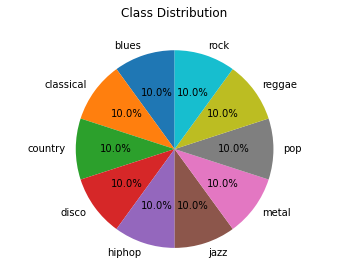

In [7]:
#Grafigi cizdik
fig, ax =plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [8]:
#Bos diziler olusturduk
signals = dict()
chroma_stft = dict()
rms = dict()
spectral_centroid = dict()
spectral_bandwidth = dict()
spectral_rolloff = dict()
zero_crossing_rate = dict()
mfcc = dict()
print("signals = ", signals)
print("chroma_stft = ", chroma_stft)
print("rms = ", rms)
print("spectral_centroid = ", spectral_centroid)
print("spectral_bandwidth = ", spectral_bandwidth)
print("zero_crossing_rate = ", zero_crossing_rate)
print("mfcc = ", mfcc)

signals =  {}
chroma_stft =  {}
rms =  {}
spectral_centroid =  {}
spectral_bandwidth =  {}
zero_crossing_rate =  {}
mfcc =  {}


In [9]:
for c in classes:
    file = dataFrame[dataFrame.label==c].iloc[0,0]#Her kategoriden bir ses dosyanin adini aldik
    signal, rate = librosa.load(directory+c+'/'+file)#Ses dosyalarinin hizini ve signalini diziye atadik
    signals[c] = signal#Alinan sinyali hangi ses dosyasina ait ise ona karşılık gelecek sekilde diziye yerlestirdik
    
    """Asagida sinyallerin ozelliklerini cikarma islemi yaptik.
    Görseli daha büyük gösterebilmek icin sinyallerin bir
    kismini aldik(signal[:rate]). Görseli yatay görebilmek icin de
    mfcc de ".T" ile transpozunu aldik."""
    chroma_stft[c] = librosa.feature.chroma_stft(y=signal[:rate], sr=rate)
    rms[c] = librosa.feature.rms(y=signal[:int(rate/8)])
    spectral_centroid[c] = librosa.feature.spectral_centroid(y=signal[:int(rate/8)], sr=rate)
    spectral_bandwidth[c] = librosa.feature.spectral_bandwidth(y=signal[:int(rate/8)], sr=rate)
    spectral_rolloff[c] = librosa.feature.spectral_rolloff(y=signal[:int(rate/8)], sr=rate)
    zero_crossing_rate[c] = librosa.feature.zero_crossing_rate(y=signal[:int(rate/8)])
    mfcc[c] = librosa.feature.mfcc(y=signal[:int(rate/8)], sr=rate).T

In [10]:
#Asagida yukarida olusturdugumuz fonksiyonlari kullanarak sinyallerin özelliklerinin grafiklerini cizdirdik

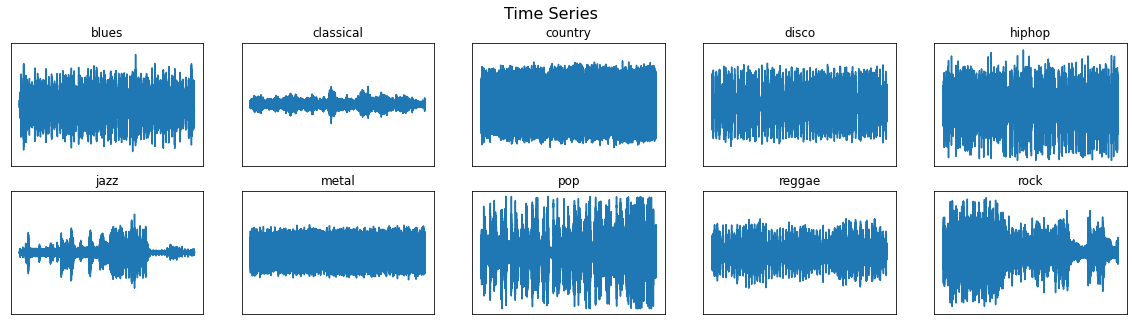

In [11]:
plot_signals(signals)
plt.show()

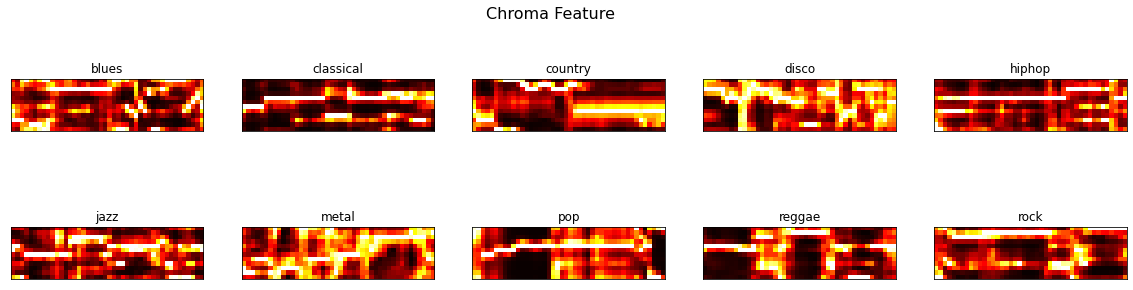

In [12]:
plot_feature(chroma_stft, 'Chroma Feature')
plt.show()

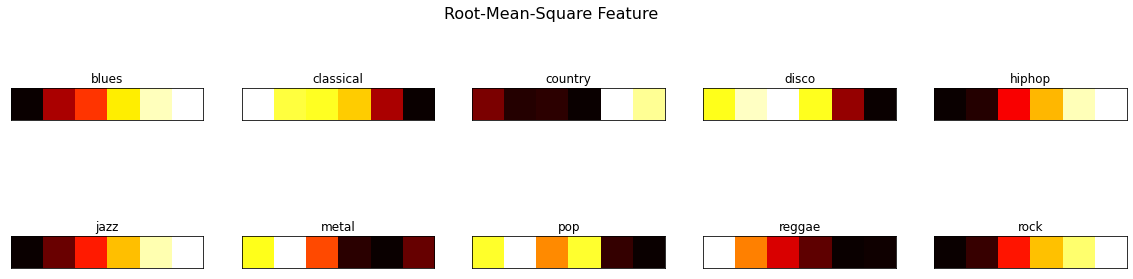

In [13]:
plot_feature(rms, 'Root-Mean-Square Feature')
plt.show()

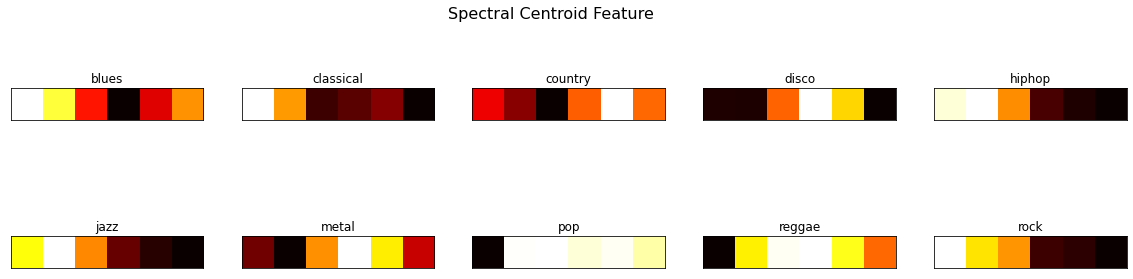

In [14]:
plot_feature(spectral_centroid, 'Spectral Centroid Feature')
plt.show()

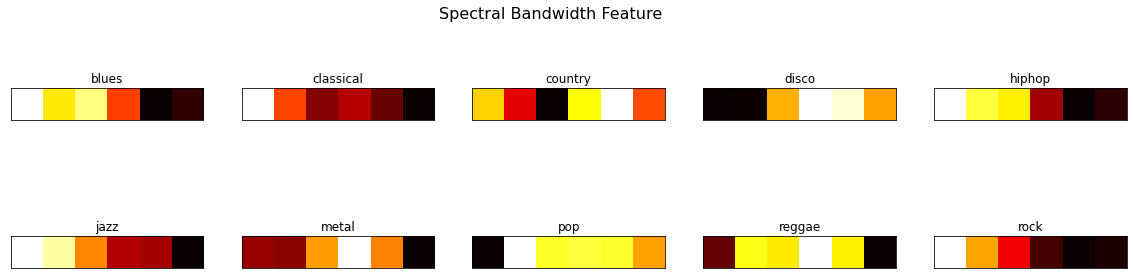

In [15]:
plot_feature(spectral_bandwidth, 'Spectral Bandwidth Feature')
plt.show()

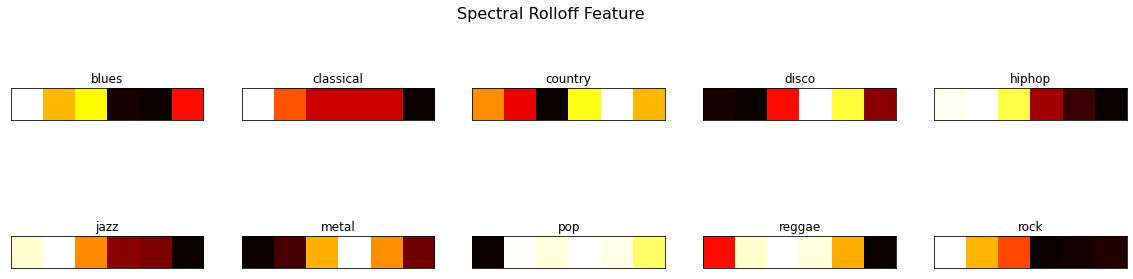

In [16]:
plot_feature(spectral_rolloff, 'Spectral Rolloff Feature')
plt.show()

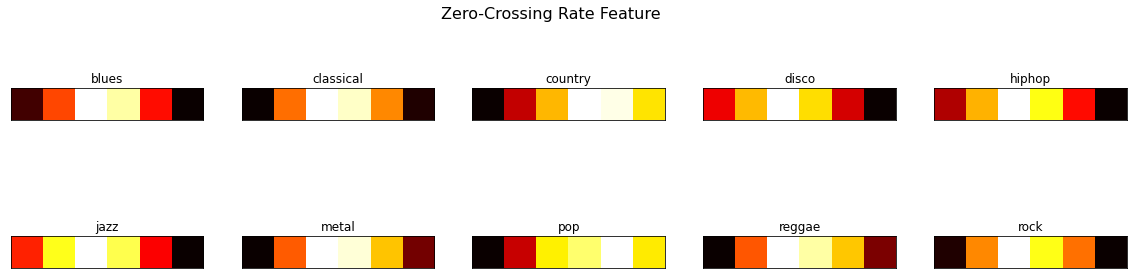

In [17]:
plot_feature(zero_crossing_rate, 'Zero-Crossing Rate Feature')
plt.show()

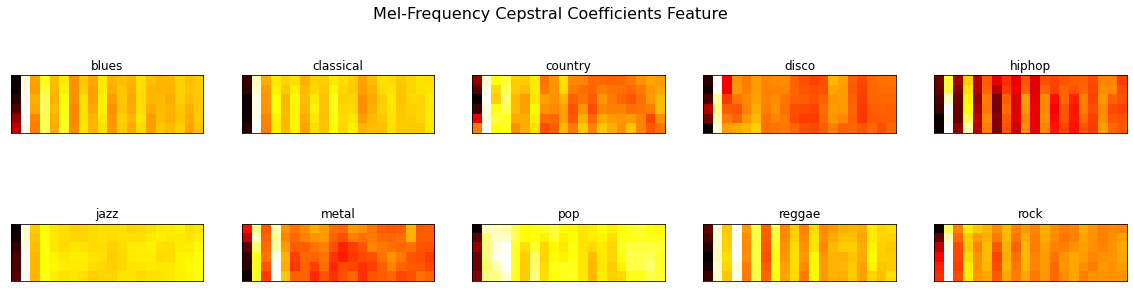

In [18]:
plot_feature(mfcc, 'Mel-Frequency Cepstral Coefficients Feature')
plt.show()